# STROKE DETECTION

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as  plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\gagan\OneDrive\Desktop\healthcare-dataset-stroke-data.csv")

# EDA

In [3]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,yes
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,yes
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,yes
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,yes
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,yes


In [4]:
data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,no
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,no
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,no
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,no
4908,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 460.3+ KB


In [6]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
data.describe(include = 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,2
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,no
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,4700
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,NaN
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,NaN
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,NaN
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,NaN
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,NaN
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,NaN


In [8]:
columns = []
for column in data:
    columns.append(column)
print(type(columns),"\n",[i for i in columns])

<class 'list'> 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [9]:
#before encoding 
for column in columns:
    print(column,"=>")
    print(data[column].unique())
    print("\n")

id =>
[ 9046 31112 60182 ... 19723 37544 44679]


gender =>
['Male' 'Female' 'Other']


age =>
[6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = data.copy()
for column in columns:
    data[column] = encoder.fit_transform(data[column]) #suffix
    #data[column + '_encoded'] = encoder.fit_transform(data[column]) #suffix
data.sample(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4164,2018,0,51,0,0,1,2,1,1606,325,2,0
898,2571,1,52,0,0,1,2,1,1420,174,3,0
3498,2060,1,32,0,0,0,4,0,2034,77,0,0
1563,2645,0,53,0,0,0,2,1,484,84,2,0
4124,3547,1,68,0,0,1,2,1,319,141,3,0
3044,1571,0,78,1,0,1,2,1,1727,311,1,0


In [11]:
#after encoding 
for column in columns:
    print(column,"=>")
    print(data[column].unique())
    print("\n")

id =>
[ 594 2019 4042 ... 1289 2451 2923]


gender =>
[1 0 2]


age =>
[ 88 101  70 100 102  95  90  99  82  75  71  85  96  81  92  73 103  86
  78  63  69  93  79  97  60  98  84  94  77  66  91  80  87  64  89  68
  74  59  76  67  53  72  35  24  29  58  61  56  41  65  46  48  44  38
  34  25  37  43  51  50  32  42  39  54  45  57   7  55  62  10  26  47
  52  28  33  83  23  30  36  49  31  21   3  12  40  27  13  11  16  20
   2  19  18   8  22  14   9   4   0  17   6  15   1   5]


hypertension =>
[0 1]


heart_disease =>
[1 0]


ever_married =>
[1 0]


work_type =>
[2 3 0 4 1]


Residence_type =>
[1 0]


avg_glucose_level =>
[3734 2429 3309 ... 1290 3289 1426]


bmi =>
[239 198 217 113 163 147 101 115 170 241 146 155 182 248 131 251  97 355
 139 145 108 156 314 127  95 178 138 210 104 193 172 112 158 137  75 209
 259 265 150 187 238 205 201 277 126 175 343  76 173 162 154 184  90 143
 114 330 313 102 164 196 284 129 171 136 135 167 117 153 161 219  67 176
 288  99 398 144 186

Text(0, 0.5, 'Frequency')

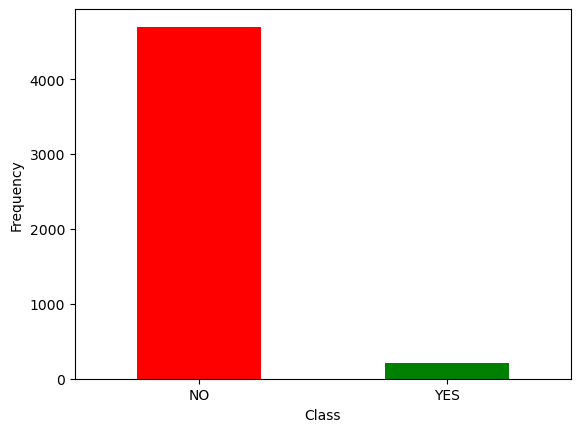

In [12]:
labels = ['NO','YES']
sh = pd.Series(data['stroke']).value_counts(sort = True)
sh.plot(kind = 'bar',rot = 0,color = ['red','green'])
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
data['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

In [14]:
ys = data[data['stroke'] == 1]
ns = data[data['stroke'] == 0]

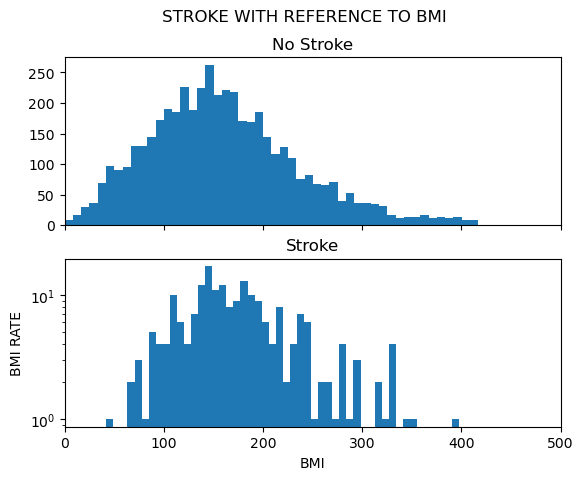

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('STROKE WITH REFERENCE TO BMI')
bins = 50
ax1.hist(ns.bmi, bins = bins)
ax1.set_title('No Stroke')
ax2.hist(ys.bmi, bins = bins)
ax2.set_title('Stroke')
plt.xlabel('BMI')
plt.ylabel('BMI RATE')
plt.xlim((0, 500))
plt.yscale('log')
plt.show()

In [16]:
ys.value_counts()

id    gender  age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi  smoking_status  stroke
9     1       102  0             0              1             3          0               1760               187  2               1         1
2419  0       102  0             0              1             2          0               1122               107  2               1         1
3189  1       101  0             1              1             2          1               498                115  3               1         1
3236  1       95   0             0              1             2          1               2119               129  0               1         1
3279  0       35   0             0              0             4          0               99                 182  0               1         1
                                                                                                                                          ..
1845  1       82  

In [17]:
ns.value_counts()

id    gender  age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi  smoking_status  stroke
0     0       34   0             0              0             4          0               1448               59   0               0         1
3257  0       52   0             0              0             2          1               2439               97   2               0         1
3273  1       90   0             0              1             2          1               2137               112  1               0         1
3272  1       96   0             0              1             2          0               856                118  1               0         1
3271  0       33   0             0              0             4          1               107                86   2               0         1
                                                                                                                                          ..
1631  1       65  

In [18]:
x = data.drop(columns='stroke', axis=1)
y = data['stroke']

## UNDERSAMPLING

<Axes: ylabel='count'>

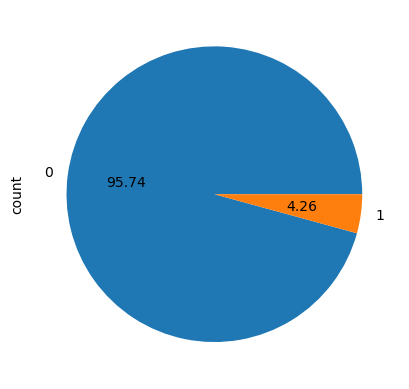

In [19]:
#before undersampling
y.value_counts().plot.pie(autopct = '%.2f')

In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
x, y = rus.fit_resample(x, y)

<Axes: ylabel='count'>

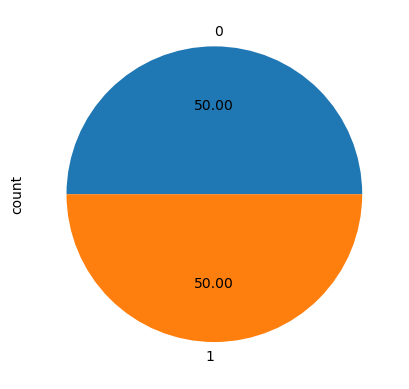

In [21]:
#after undersampling
y.value_counts().plot.pie(autopct = '%.2f')

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20,random_state = 42)

In [23]:
print(x.shape, xtrain.shape, xtest.shape)

(418, 11) (334, 11) (84, 11)


In [24]:
print(y.shape, ytrain.shape, ytest.shape)

(418,) (334,) (84,)


## LOGISTIC REGRESSION

In [25]:
model = LogisticRegression()

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(xtrain)

In [27]:
model.fit(scaled_data, ytrain)

LogisticRegression()

In [28]:
X_train_prediction = model.predict(scaled_data)
training_data_accuracy = accuracy_score(X_train_prediction, ytrain)

In [29]:
print('Accuracy score on Test Data : ', training_data_accuracy)

Accuracy score on Test Data :  0.7544910179640718


In [30]:
X_test_prediction_dt = model.predict(scaler.transform(xtest))

In [31]:
test_data_accuracy = accuracy_score(X_test_prediction_dt, ytest)

In [32]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8214285714285714
